In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import geopandas

In [20]:
import contextily as ctx # pip install contextily==1.0rc2

In [21]:
%matplotlib inline

## Load data

In [22]:
# df = pd.read_csv("../data/cityracks.shp") 

racks = geopandas.read_file("../data/cityracks-shp/cityracks.shp")

In [23]:
racks.head()

,SITE_ID,Borough,CD,BBL,House__,Street_Nam,Street_On,From_Stree,To_Street,Side_of_St,Asset_Type,Latitude,Longitude,geometry
0,18941.0,Brooklyn,None,None,15.0,LAFAYETTE AV,LAFAYETTE AV,FLATBUSH AV,ASHLAND PL,None,Bike Rack,40.686790,-73.978510,POINT (-73.97851 40.68679)
1,18940.0,Brooklyn,None,None,15.0,LAFAYETTE AV,LAFAYETTE AV,FLATBUSH AV,ASHLAND PL,None,Bike Rack,40.686790,-73.978510,POINT (-73.97851 40.68679)
2,18939.0,Brooklyn,None,None,15.0,LAFAYETTE AV,LAFAYETTE AV,FLATBUSH AV,ASHLAND PL,None,Bike Rack,40.686790,-73.978510,POINT (-73.97851 40.68679)
3,18658.0,Brooklyn,None,None,24.0,4 AV,4 AV,ATLANTIC AV,PACIFIC ST,None,Bike Rack,40.684012,-73.978633,POINT (-73.978633 40.684012)
4,18995.0,Brooklyn,None,None,65.0,LAFAYETTE AV,LAFAYETTE AV,S ELLIOTT PL,FORT GREENE PL,None,Bike Rack,40.687072,-73.975805,POINT (-73.97580499999999 40.687072)


## Plot bike racks

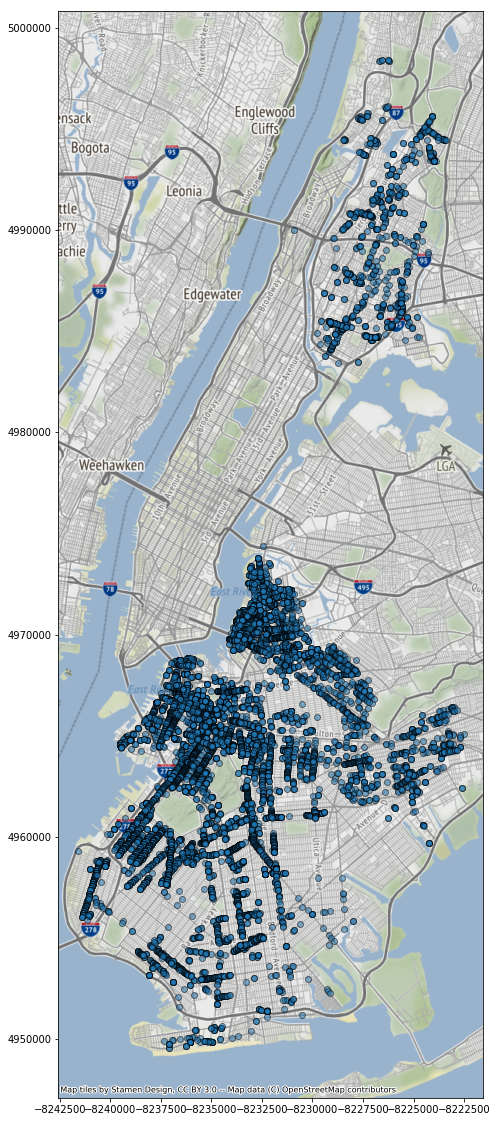

In [24]:
# TODO: find racks with lat/long out of range for epsg 3857
ax = racks.head(12000).to_crs(epsg=3857).plot(figsize=(20, 20), alpha=0.5, edgecolor='k')

ctx.add_basemap(ax)

In [25]:
import ipyleaflet

In [26]:
center = (52.204793, 360.121558)

m = ipyleaflet.Map(center=center, zoom=15)

marker = ipyleaflet.Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [27]:
import folium

In [28]:
from folium import plugins
from folium.plugins import HeatMap

In [40]:
m = folium.Map(location=(40.68679, -73.97851), zoom_start=10)

rack_coords = racks.apply(lambda r: (r["Latitude"], r['Longitude']), axis=1)
HeatMap(rack_coords, radius=10).add_to(m)
m

In [58]:
m = folium.Map(location=(40.68679, -73.97851), zoom_start=10)
rack_coords = racks.apply(lambda r: (r["Latitude"], r['Longitude']), axis=1)

for r in rack_coords[:100]:
    folium.Marker(r, popup='lmao').add_to(m)

m

## Mock server response

In [ ]:
import json

In [60]:
def serialize_as_json(row):
    return {
        'latitude': row.Latitude,
        'longitude': row.Longitude,
        'house_number': row.House__,
        'street_name': row.Street_Nam
    }

mock_server_response = json.dumps(list(racks.head(100).apply(serialize_as_json, axis=1)))
mock_server_response

'[{"latitude": 40.68679, "longitude": -73.97851, "house_number": 15.0, "street_name": "LAFAYETTE AV"}, {"latitude": 40.68679, "longitude": -73.97851, "house_number": 15.0, "street_name": "LAFAYETTE AV"}, {"latitude": 40.68679, "longitude": -73.97851, "house_number": 15.0, "street_name": "LAFAYETTE AV"}, {"latitude": 40.684012, "longitude": -73.978633, "house_number": 24.0, "street_name": "4 AV"}, {"latitude": 40.687072, "longitude": -73.975805, "house_number": 65.0, "street_name": "LAFAYETTE AV"}, {"latitude": 40.720247, "longitude": -73.955151, "house_number": 104.0, "street_name": "BEDFORD AV"}, {"latitude": 40.720247, "longitude": -73.955151, "house_number": 104.0, "street_name": "BEDFORD AV"}, {"latitude": 40.720247, "longitude": -73.955151, "house_number": 104.0, "street_name": "BEDFORD AV"}, {"latitude": 40.652009, "longitude": -73.972513, "house_number": 251.0, "street_name": "PROSPECT PK SW"}, {"latitude": 40.680009, "longitude": -73.995007, "house_number": 349.0, "street_name"

In [51]:
racks.columns

Index(['SITE_ID', 'Borough', 'CD', 'BBL', 'House__', 'Street_Nam', 'Street_On',
       'From_Stree', 'To_Street', 'Side_of_St', 'Asset_Type', 'Latitude',
       'Longitude', 'geometry'],
      dtype='object')